Importing Libraries

In [2]:
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator


Preprocessing Training Set

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set', 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


Preprocessing Test Set

In [4]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set', 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


Initialising CNN

In [5]:
cnn = tf.keras.models.Sequential()

Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/Users/niteshjeganathan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding Second Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training CNN

In [12]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_set, validation_data=test_set, epochs=25)   

Epoch 1/25


/Users/niteshjeganathan/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 196ms/step - accuracy: 0.5424 - loss: 0.6916 - val_accuracy: 0.6630 - val_loss: 0.6196
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.6765 - loss: 0.6057 - val_accuracy: 0.6440 - val_loss: 0.6439
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 197ms/step - accuracy: 0.6963 - loss: 0.5829 - val_accuracy: 0.7400 - val_loss: 0.5364
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 229ms/step - accuracy: 0.7300 - loss: 0.5288 - val_accuracy: 0.7370 - val_loss: 0.5337
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.7471 - loss: 0.5059 - val_accuracy: 0.7150 - val_loss: 0.5591
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 218ms/step - accuracy: 0.7482 - loss: 0.4989 - val_accuracy: 0.7235 - val_loss: 0.5754
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 258ms/step - accuracy: 0.7773 - loss: 0.4784 - val_accuracy: 0.7420 - val_loss: 0.5330
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 240ms/step - accuracy: 0.7820 - loss: 0.4538 - val

Making a single prediction

In [13]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset/sample_set/cat.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)

if(result[0][0] == 1):
    prediction = 'dog'
else:  
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
cat


Making a random prediction from test set

dog.4048.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


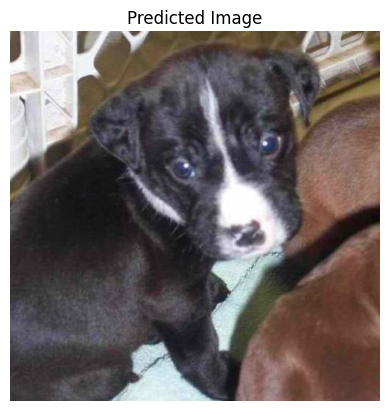

Prediction: cat


In [34]:
import os
import random
import matplotlib.pyplot as plt

test_set_folder = 'dataset/test_set/'

subfolders = ['cats/', 'dogs/']

chosen_subfolder = random.choice(subfolders)

image_files = [f for f in os.listdir(os.path.join(test_set_folder, chosen_subfolder))]
random_image = random.choice(image_files)
print(random_image)

path = test_set_folder + chosen_subfolder + random_image
random_test_image = image.load_img(path, target_size=(64, 64))
random_test_image = image.img_to_array(random_test_image)
random_test_image = np.expand_dims(random_test_image, axis=0)

random_result = cnn.predict(random_test_image)

if random_result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

plt.imshow(image.load_img(path))
plt.title('Predicted Image')
plt.axis('off')
plt.show()
print(f"Prediction: {prediction}")
